<a href="https://colab.research.google.com/github/ehpub/statistics_python/blob/main/%ED%86%B5%EA%B3%84_with_python_F%EB%B6%84%ED%8F%AC%EC%99%80_F%EA%B2%80%EC%A0%95(%EB%93%B1%EB%B6%84%EC%82%B0%EA%B2%80%EC%A0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/f%eb%b6%84%ed%8f%ac%ec%99%80-f%ea%b2%80%ec%a0%95%eb%93%b1%eb%b6%84%ec%82%b0%ea%b2%80%ec%a0%95-%ed%8c%8c%ec%9d%b4%ec%8d%ac%ec%9c%bc%eb%a1%9c-%eb%8b%a4%eb%a3%a8%eb%8a%94-%ed%86%b5%ea%b3%84/)

사용할 모듈 포함문

In [96]:
import scipy as sp
from scipy import stats
from scipy.stats import f #F분포
from scipy.stats import chi2 #카이제곱분포
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## F분포

카이제곱분포를 따르는 두 개의 분포가 있을 때 두 개의 분산 비율을 비교하기 위한 분포입니다.

두 개의 분포가 A, B라고 하자.(자유도는 a,b)

A의 표본을 x1, B의 표본을 x2라고 했을 때 x1/a를 x2/b로 나눈 값의 분포를 F분포라 합니다.

- F분포의 샘플 생성

In [97]:
sample = f.rvs(dfn=5,dfd=7,size=100)
print(sample)

[2.62600381 1.60337962 1.55017751 1.15858907 0.14570837 1.62978651
 1.36743155 1.66963104 1.80218564 0.49145854 3.56085621 1.37489861
 0.95536242 0.83700464 0.20497699 0.40970639 3.70819578 2.2783963
 0.35821819 0.86482416 3.91160418 1.06727053 1.44872377 0.68247005
 0.88096718 1.2557473  0.83340679 0.92973642 0.45467542 0.43327642
 0.68269401 1.23657828 1.29944727 0.82686232 1.97173864 0.36814817
 1.88081733 0.45097023 1.16362747 1.02905303 0.54337998 2.03138068
 0.29530759 1.0999222  1.26105966 0.5041756  0.67363905 1.35584471
 0.76596062 0.58368238 2.34178516 0.34796832 1.27878929 2.51584067
 1.561901   0.96765528 1.65810946 0.64980389 0.79729748 0.15351174
 0.9216806  3.14893193 1.658196   0.58729871 0.52209482 0.65376967
 0.53279876 1.91078218 0.61193385 2.01349602 1.29090102 1.67271344
 0.13948061 0.47997901 0.75215119 0.7370377  0.81775238 1.2418709
 2.71860808 1.57447799 0.63376674 2.69898809 0.71001588 0.78604676
 1.48633537 1.01629669 1.58611377 4.09442384 1.61712783 0.509324

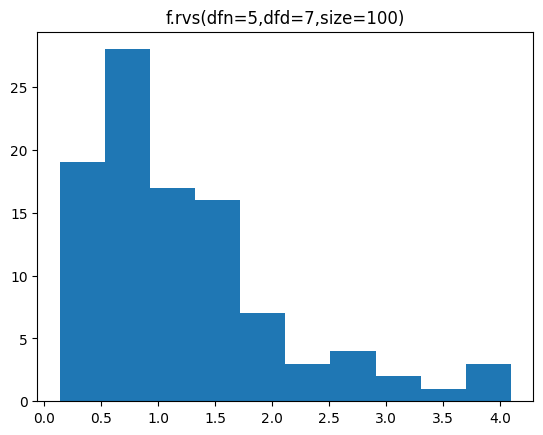

In [127]:
plt.hist(sample)
plt.title('f.rvs(dfn=5,dfd=7,size=100)')
plt.show()

- F분포의 확률 밀도 함수

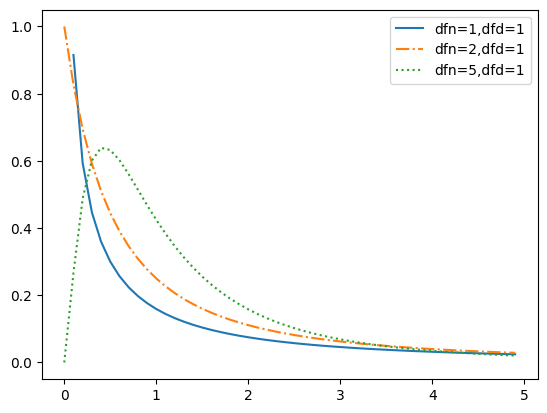

In [129]:
x = np.arange(0,5,0.1)
ls = ['-','-.',':']
for i,(d1,d2) in enumerate([(1,1),(2,1),(5,1)]):
  y = f.pdf(dfn=d1,dfd=d1,x=x)
  plt.plot(x,y,linestyle=ls[i],label=f'dfn={d1},dfd={d2}')
plt.legend()
plt.show()

- F분포의 누적 분포 함수를 이용한 등분산검정

A학교에서 두 과목 시험을 실시하였다.

두 개 과목의 성적은 다음과 같다고 한다.

S1 : 90, 85, 72, 70, 72, 89

S2 : 80, 70, 64, 20, 40, 59, 88, 90

두 개 과목의 분산 비율은 같다고 볼 수 있는지 유의수준 5%에서 검정하시오.

In [103]:
s1 = np.array([90, 85, 72, 70, 72, 89])
s2 = np.array([80, 70, 64, 20, 40, 59, 88, 90])
fv = s1.var(ddof=1)/s2.var(ddof=1) #분산비율
pv = f.cdf(fv,dfd=len(s1)-1, dfn=len(s2)-1) #누적 확률 분포
if pv>0.5:
  fpv = 2*(1-pv)
else:
  fpv = 2*pv
print("pvalue:",fpv)
if fpv<0.05:
  print("귀무 가설을 기각한다.")
  print("유의한 수준으로 두 과목의 분산이 다르다고 볼 수 있다.")
else:
  print("귀무 가설을 채택한다.")
  print("유의한 수준으로 두 과목의 분산이 다르다고 볼 수 없다.")

pvalue: 0.026555995726846655
귀무 가설을 기각한다.
유의한 수준으로 두 과목의 분산이 다르다고 볼 수 있다.


In [141]:
def f_test(s1,s2,how=0): #how:0-two sided, 1-less, 2-greater
  fv = s1.var(ddof=1)/s2.var(ddof=1) #분산비율
  pv = f.cdf(fv,dfd=len(s1)-1, dfn=len(s2)-1) #누적 확률 분포
  if how == 0: #two-sided
    if pv>0.5:
      fpv = 2*(1-pv)
    else:
      fpv = 2*pv
    return fpv
  if how == 1: #less
    return pv
  return 1-pv #greater

In [142]:
p1 = f_test(s1,s2,how=0)
p2 = f_test(s1,s2,how=1)
p3 = f_test(s1,s2,how=2)
print(round(p1,3), "two-sided")
print(round(p2,3), "less")
print(round(p3,3), "greater")

0.027 two-sided
0.013 less
0.987 greater


- F분포의 퍼센트 포인트 함수

F분포는 좌우 대칭이 아닙니다. F분포로 등분산검정을 했을 때 영역을 퍼센트 포인트 함수를 이용해 도식해 보기로 합시다.



In [147]:
p = f_test(s1,s2,how=0)
lp = p/2
hp = 1-p/2
lfv = f.ppf(q=lp, dfn=len(s1)-1, dfd=len(s2)-1)
hfv = f.ppf(q=hp, dfn=len(s1)-1, dfd=len(s2)-1)
print(lfv,hfv)

0.1087214949230186 6.726717032967035


In [148]:
con_lfv = f.ppf(q=0.025, dfn=len(s1)-1, dfd=len(s2)-1)
con_hfv = f.ppf(q=0.975, dfn=len(s1)-1, dfd=len(s2)-1)
print(con_lfv,con_hfv)

0.14591988388835198 5.285236851504278


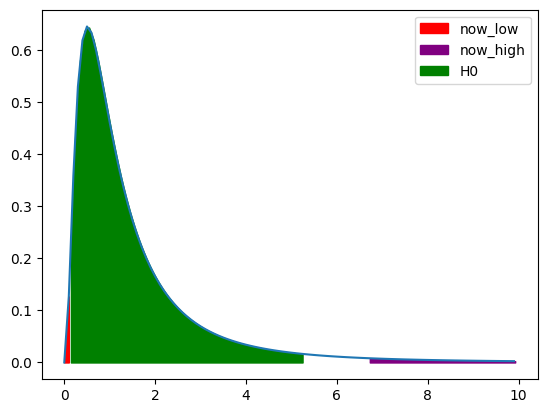

In [145]:
x = np.arange(0,10,0.1)
y = f.pdf(x,dfd=5, dfn=7)
plt.plot(x,y)

x2 = np.arange(0,lfv,0.1)
y2 = f.pdf(x2,dfd=5, dfn=7)
plt.fill_between(x2,y2,color='r',label='now_low')
x3 = np.arange(hfv,10,0.1)
y3 = f.pdf(x3,dfd=5, dfn=7)
plt.fill_between(x3,y3,color='purple',label='now_high')

con_x = np.arange(con_lfv,con_hfv,0.1)
con_y = f.pdf(con_x,dfd=5, dfn=7)
plt.fill_between(con_x,con_y,color='g',label='H0')
plt.legend()
plt.show()